# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att7'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

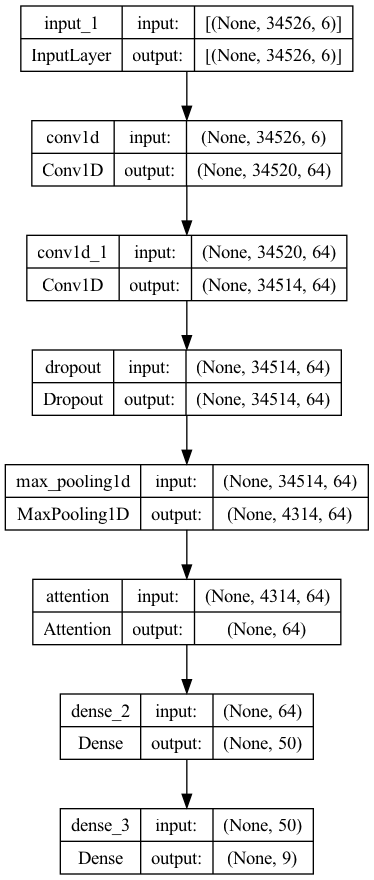

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 6)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34520, 64)         2688      
                                                                 
 conv1d_1 (Conv1D)           (None, 34514, 64)         28672     
                                                                 
 dropout (Dropout)           (None, 34514, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4314, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                7920      
                                                             

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 303s 954ms/step - loss: 4.0951 - ERM: -0.2229 - KDEL: -0.0060 - LMA: -0.0079 - MITO: 0.0519 - NES: 0.0290 - NIK: 0.0339 - NLS: 0.0086 - NUCP: -0.0659 - OMM: 0.0568 - val_loss: 3.1682 - val_ERM: -0.0767 - val_KDEL: -0.1321 - val_LMA: 0.0534 - val_MITO: -0.3969 - val_NES: 0.0691 - val_NIK: 0.3887 - val_NLS: -0.1224 - val_NUCP: -0.2168 - val_OMM: -0.1998
Epoch 2/10
311/311 [==============================] - 300s 949ms/step - loss: 3.1220 - ERM: -0.2043 - KDEL: 0.0445 - LMA: -0.0134 - MITO: 0.0709 - NES: 0.0508 - NIK: 0.0324 - NLS: 0.0157 - NUCP: -0.0755 - OMM: 0.0635 - val_loss: 3.0928 - val_ERM: -0.0093 - val_KDEL: -0.1162 - val_LMA: 0.0473 - val_MITO: -0.3481 - val_NES: 0.0641 - val_NIK: 0.3437 - val_NLS: -0.1140 - val_NUCP: -0.2052 - val_OMM: -0.1797
Epoch 3/10
311/311 [==============================] - 302s 953ms/step - loss: 3.0630 - ERM: -0.1615 - KDEL: 0.0607 - LMA: -0.0081 - MITO: 0.0658 - NES: 0.0514 - NIK: 0.0214 - NLS: 0.014

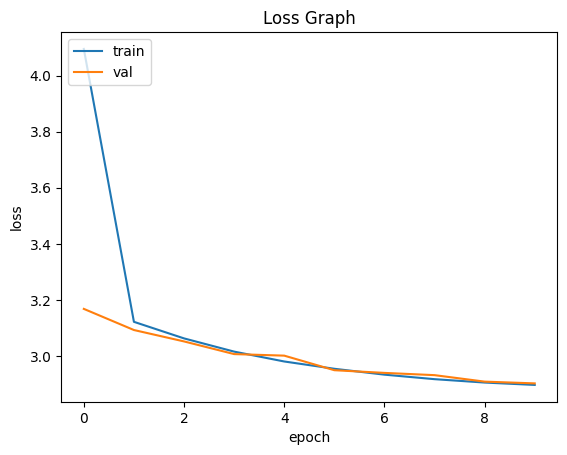

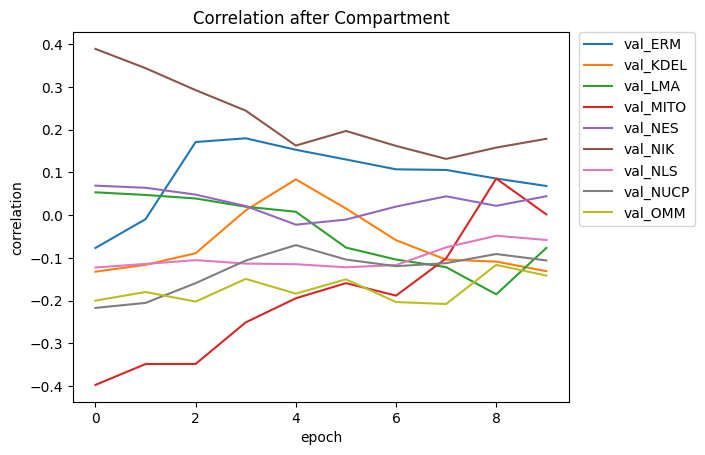

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

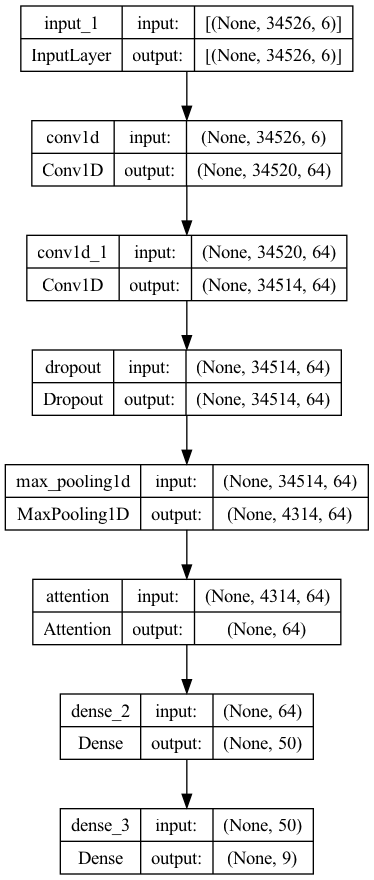

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)